# Experiment: Tau Sweep Prev Disengaged Binary Combo

**Goal**: Find best tau fit for the the combined previous disengaged which is the additive combination of binarize prev trial not started or prev violation.

Related notebooks:

* `2024_02_16_EXP_tau_sweep_prev_violation.ipynb`
* `2024_03_20_tau_sweep_prev_disengaged_combo.ipynb`
* `2024_03_20_tau_sweep_prev_disengaged_combo.ipynb`

> Written by Jess Breda 

## Imports

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

from multiglm.experiments.experiment import load_experiment

from multiglm.experiments.experiment_tau_sweep import ExperimentTauSweep

from multiglm.features.design_matrix_generator import *
from multiglm.features.design_matrix_generator_PWM import *

from multiglm.models.multiclass_logistic_regression import MultiClassLogisticRegression

from multiglm.visualizations.model_visualizer import ModelVisualizerTauSweep

from multiglm.data import ANIMAL_IDS
from multiglm.experiments import STANDARD_SIGMAS


sns.set_context("talk")
%load_ext autoreload
%autoreload 2

## Model Configs

In [5]:
standard_cols = {
    "session": lambda df: (copy(df.session)),
    "bias": lambda df: (add_bias_column(df)),
    "s_a": lambda df: (standardize(df.s_a)),
    "s_b": lambda df: (standardize(df.s_b)),
    "prev_avg_stim": lambda df: (prev_avg_stim(df, mask_prev_violation=True)),
    "prev_correct": lambda df: (prev_correct_side(df)),
    "prev_choice": lambda df: (prev_choice(df)),
    "labels": {"column_name": "choice"},
}

sweep_col = {
    "tau_sweep": {
        "taus": [0.51, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 25, 30, 40, 50, 100],
        "col_name": "filt_prev_disengaged",
        "col_func": lambda df: combine_two_cols(
            binarize(df.n_prev_trial_not_started, comparison=operator.gt, value=0),
            prev_violation(df),
            operator.add,
        ),
        "current_idx": 0,
    },
}

model_config = {
    "tau_sweep_prev_trial_not_started": {
        "model_class": MultiClassLogisticRegression,
        "dmg_config": {**standard_cols, **sweep_col},
    }
}


params = {
    "animals": ANIMAL_IDS,
    "data_type": "new_trained",
    "sigmas": STANDARD_SIGMAS,
    "random_state": 47,
    "eval_train": True,
    "model_config": model_config,
}
save_name = "2024_03_20_tau_sweep_prev_disengaged_binary.pkl"

order = [
    "bias",
    "s_a",
    "s_b",
    "prev_avg_stim",
    "prev_correct",
    "prev_choice",
    sweep_col["tau_sweep"]["col_name"],
]

## Run

In [6]:
experiment = ExperimentTauSweep(params)
experiment.run()
experiment.save(save_name)

Loading dataset type : new_trained
Loading data for animal ids:  ['W051', 'W060', 'W065', 'W066', 'W068', 'W072', 'W073', 'W074', 'W075', 'W078', 'W080', 'W081', 'W082', 'W083', 'W088', 'W089', 'W094']



 >>>> evaluating animal W051 sweeping taus of [0.51, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 25, 30, 40, 50, 100] <<<<

 ***** evaluating tau 0.51, sigma 0.07 *****
         Current function value: 64815.350974
         Iterations: 26
         Function evaluations: 155
         Gradient evaluations: 140

 ***** evaluating tau 0.51, sigma 0.13 *****
Optimization terminated successfully.
         Current function value: 64521.024416
         Iterations: 26
         Function evaluations: 39
         Gradient evaluations: 39

 ***** evaluating tau 0.51, sigma 0.25 *****
         Current function value: 64423.718579
         Iterations: 25
         Function evaluations: 37
         Gradient evaluations: 37

 ***** evaluating tau 0.51, sigma 0.5 *****
         Current function value: 64395.606859
         Iterations: 23
         Function evaluations: 81
         Gradient evaluations: 69

 ***** evaluating tau 0.51, sigma 1 *****
Optimization terminated successfully.
         Current func

## Visualize

In [7]:
# experiment = load_experiment(save_name)
mvt = ModelVisualizerTauSweep(experiment)

/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


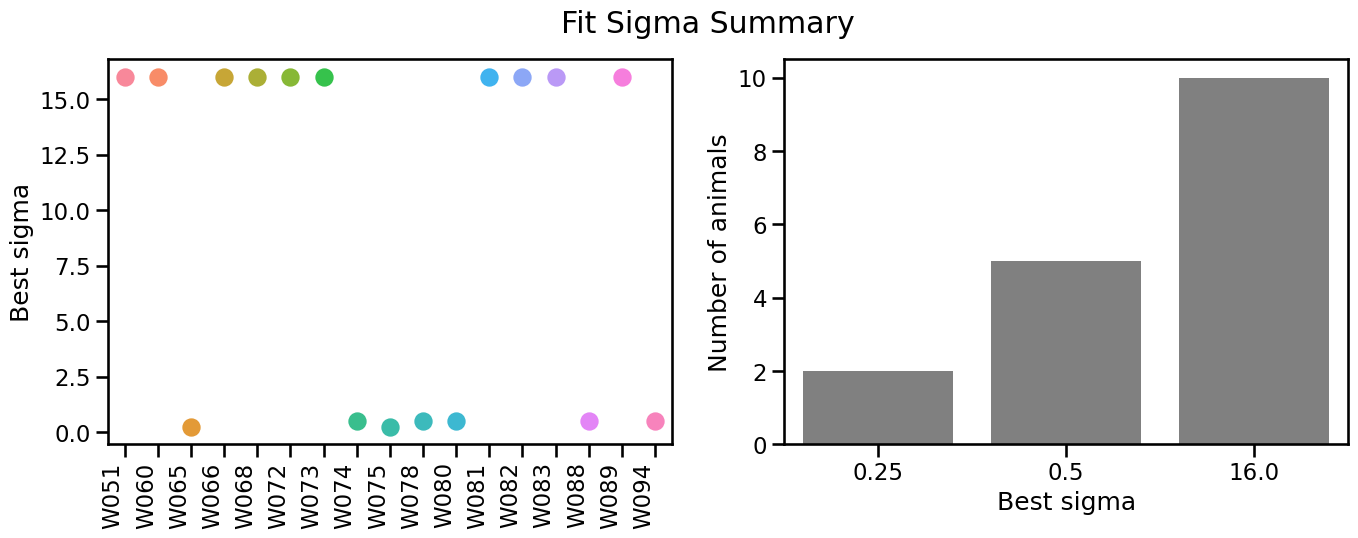

In [8]:
mvt.plot_sigma_summary()

/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


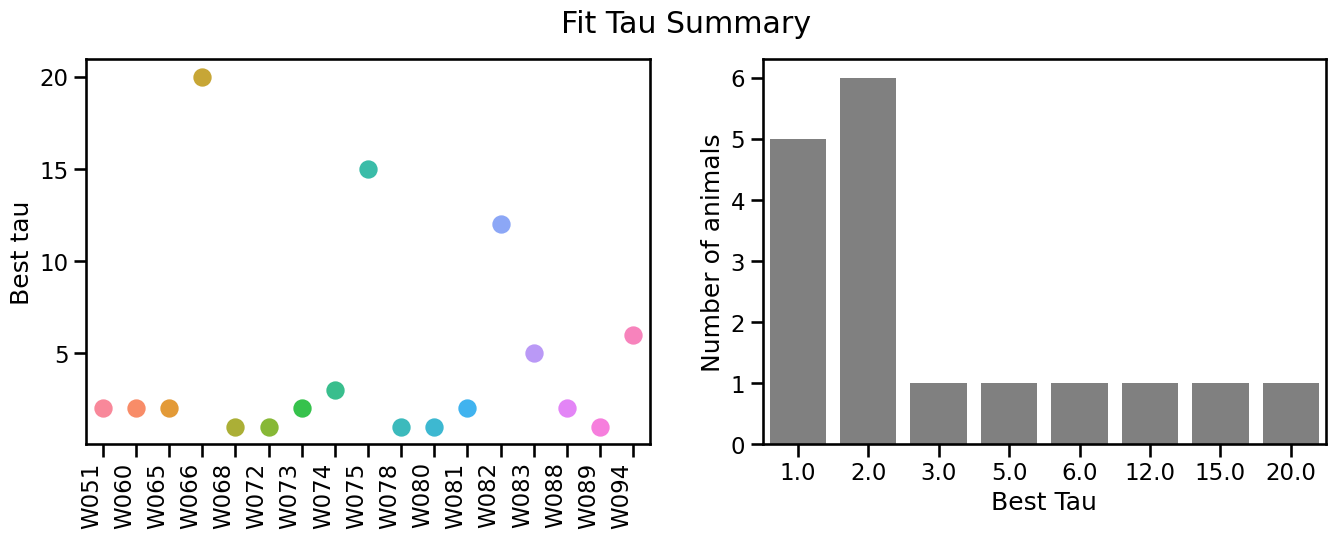

In [9]:
mvt.plot_tau_summary()

/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

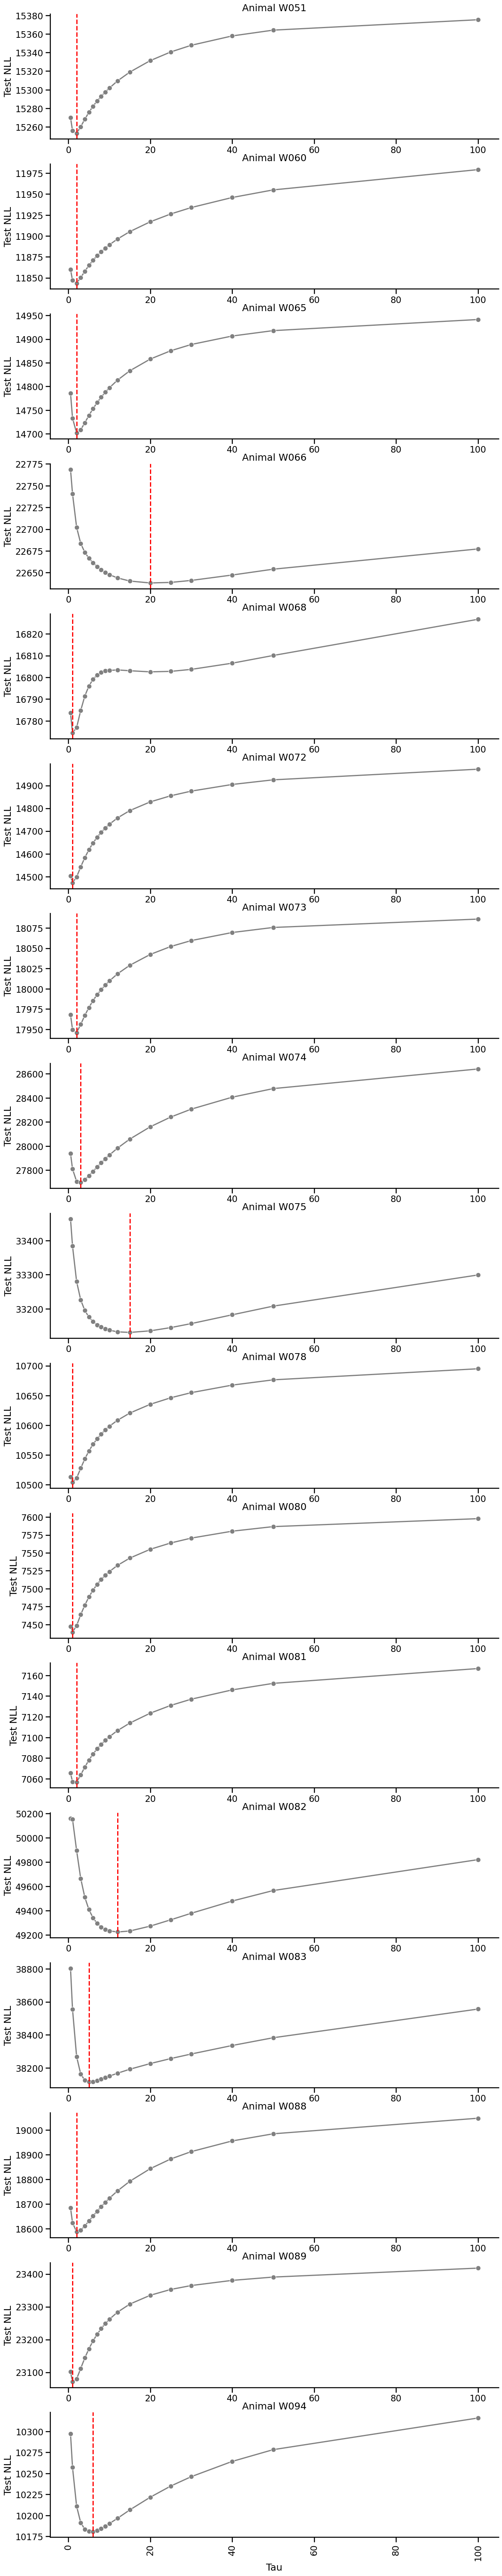

In [10]:
mvt.plot_nll_over_taus_by_animal(group="tau", color="gray")

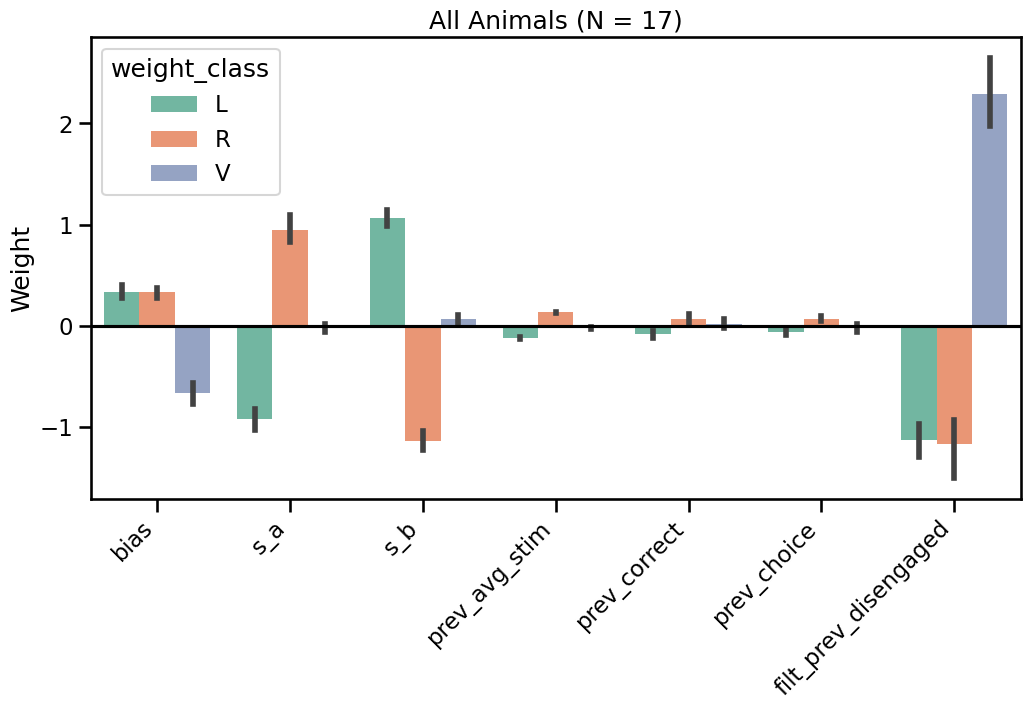

In [11]:
mvt.plot_weights_summary(palette="Set2", order=order)

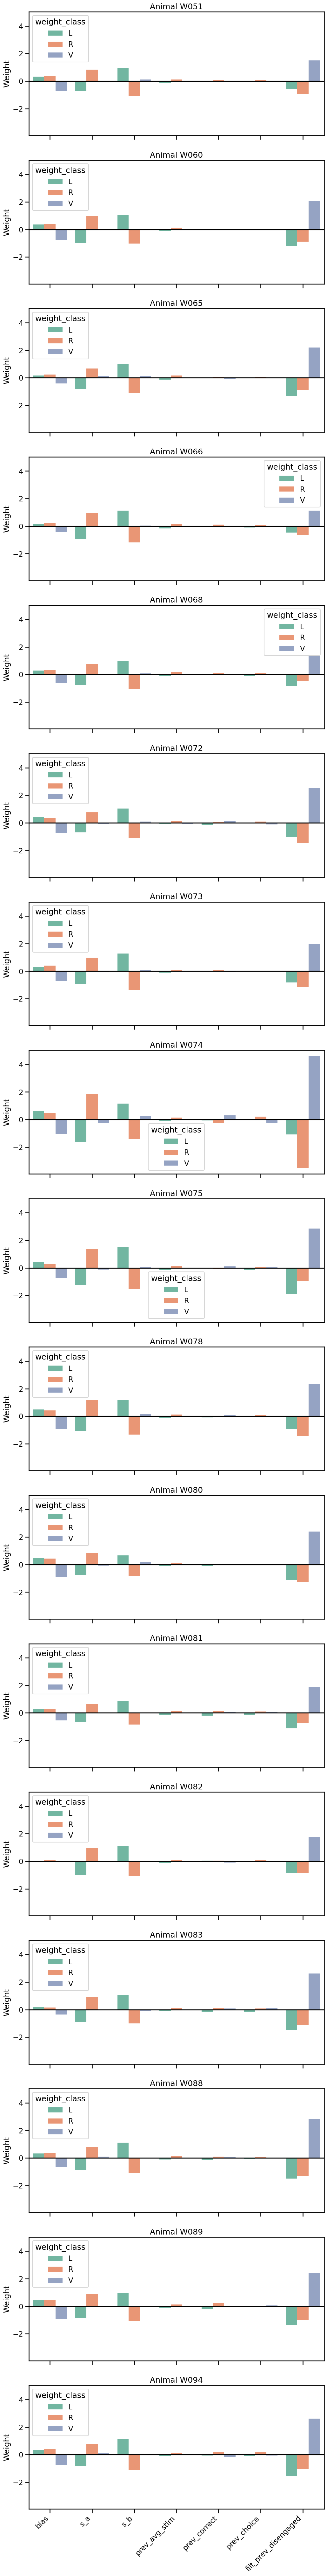

In [12]:
mvt.plot_weights_by_animal(palette="Set2", order=order)

/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


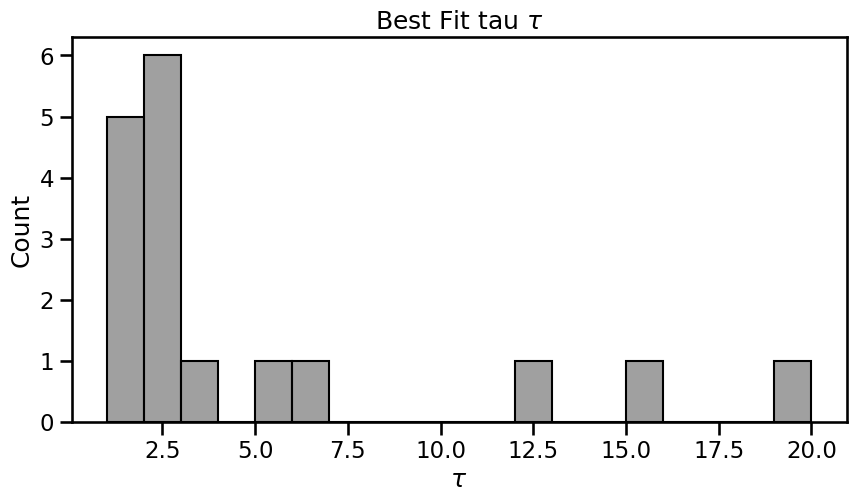

In [13]:
mvt.plot_tau_histogram(column="tau", binwidth=1)

In [16]:
mvt.save_best_fit_tau(var_name="prev_tns_viol_combo")

Saved prev_tns_viol_combo taus to taus_df.csv


## Special Fxs

In [15]:
# plot_weight_by_tau("feature_colume_name", "weight_class")